# Showing the difference between the planetary computer S2 collection and the earthaccess S2 collections

[planetary computer sentinel-2-l2a](https://planetarycomputer.microsoft.com/dataset/sentinel-2-l2a#overview)

[earthaccess sentinel-2-l2a and sentinel-2-c1-l2a](https://github.com/Element84/earth-search?tab=readme-ov-file#sentinel-2-l1c-and-l2a-sentinel-2-l1c-and-sentinel-2-l2a)

earthaccess will eventually shift to just sentinel-2-c1-l2a, waiting for processing. status [here](https://sentiwiki.copernicus.eu/web/s2-processing#S2Processing-CopernicusSentinel-2Collection-1AvailabilityStatus)

[offset issues](https://github.com/Element84/earth-search/issues/23)


In [1]:
import easysnowdata
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pystac_client
import pandas as pd

In [2]:
bbox_gdf = gpd.read_file(
    "https://github.com/egagli/easysnowdata/raw/main/docs/examples/mt_rainier.geojson"
)

## First let's check the scene quality and values

In [3]:
# the earthsearch sentinel-2-l2a catalog already applies harmonization, easysnowdata will not apply it again
s2_es = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-05-31",
    end_date="2024-07-07",
    catalog_choice="earthsearch", 
    resolution=80,
)
s2_es.data

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Since sentinel-2-l2a on earthsearch is used, harmonization step is not needed.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


<xarray.Dataset> Size: 142MB
Dimensions:      (y: 380, x: 389, time: 15)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 120B 2024-05-31T19:11:23.919000 ... 20...
Data variables: (12/16)
    coastal      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    blue         (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    green        (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    red          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge2     (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    swir22       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    aot          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    scl          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    wvp          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    visual       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [4]:
# the earthsearch sentinel-2-c1-l2a catalog does not apply harmonization, easysnowdata will apply to automatically to relevant scenes
s2_es_c1 = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-05-31",
    end_date="2024-07-07",
    catalog_choice="earthsearch", 
    collection="sentinel-2-c1-l2a", 
    resolution=80,
)
s2_es_c1.data

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


<xarray.Dataset> Size: 142MB
Dimensions:      (time: 15, y: 380, x: 389)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 120B 2024-05-31T19:11:23.919000 ... 20...
Data variables: (12/16)
    coastal      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    blue         (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    green        (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    red          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge2     (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    swir22       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    aot          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    scl          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    wvp          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    visual       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [5]:
# the planetarycomputer sentinel-2-c1-l2a catalog does not apply harmonization, easysnowdata will apply to automatically to relevant scenes
s2_pc = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-05-31",
    end_date="2024-07-07",
    catalog_choice="planetarycomputer",
    resolution=80,
)
s2_pc.data

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.


<xarray.Dataset> Size: 142MB
Dimensions:      (time: 15, y: 380, x: 389)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 120B 2024-05-31T18:59:19.024000 ... 20...
Data variables: (12/16)
    coastal      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    blue         (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    green        (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    red          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge      (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    rededge2     (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    ...           ...
    swir16       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    swir22       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    aot          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    scl          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    wvp          (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
    visual       (time, y, x) float32 9MB dask.array<chunksize=(1, 380, 389), meta=np.ndarray>
Attributes:
    band_info:       {'B01': {'name': 'coastal', 'description': 'Coastal aero...
    scl_class_info:  {0: {'name': 'No Data (Missing data)', 'color': '#000000...

In [6]:
red_es = s2_es.data.red.isel(time=0).compute()
red_values_es = red_es.values.flatten()

red_es_c1 = s2_es_c1.data.red.isel(time=0).compute()
red_values_es_c1 = red_es_c1.values.flatten()

red_pc = s2_pc.data.red.isel(time=0).compute()
red_values_pc = red_pc.values.flatten()

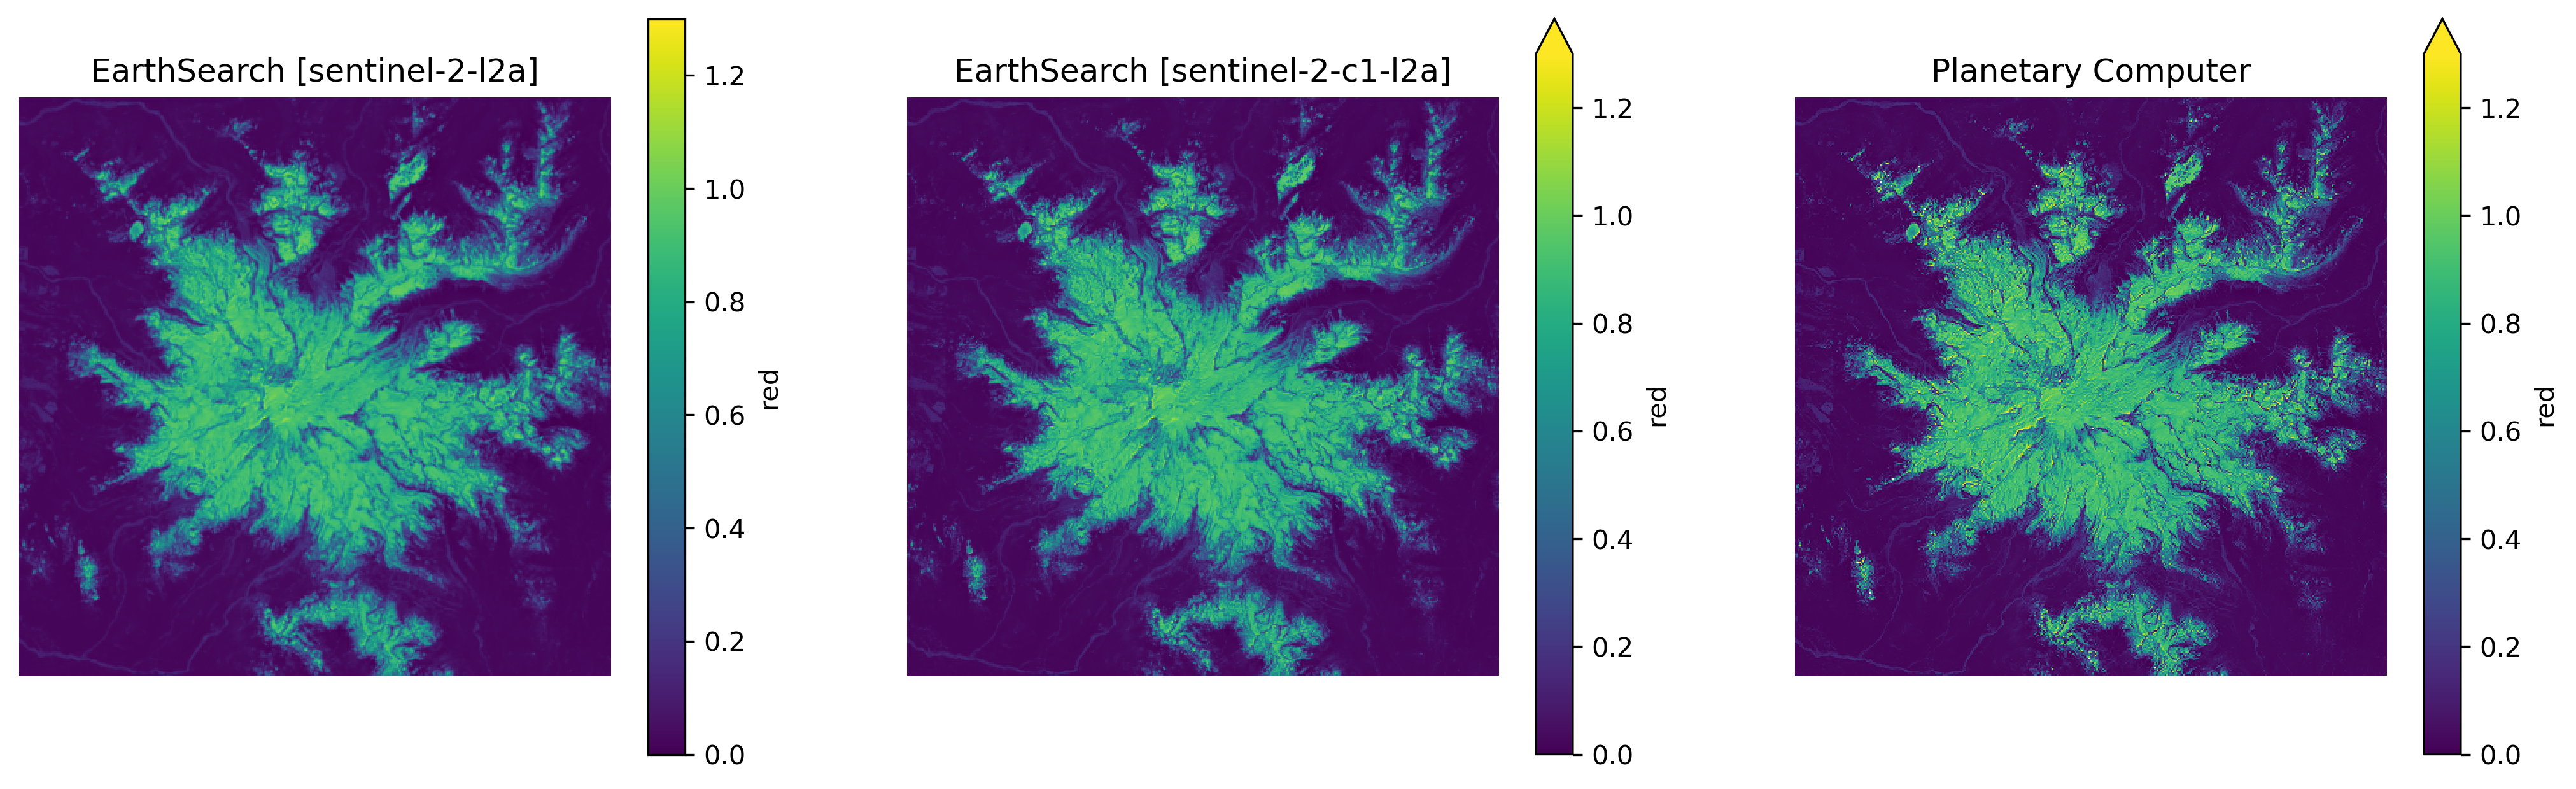

In [7]:
f,axs=plt.subplots(1,3,figsize=(17,5),dpi=300, sharex=True,sharey=True)

red_es.plot(ax=axs[0],vmin=0,vmax=1.3)
axs[0].set_title("EarthSearch [sentinel-2-l2a]")

red_es_c1.plot(ax=axs[1],vmin=0,vmax=1.3)
axs[1].set_title("EarthSearch [sentinel-2-c1-l2a]")

red_pc.plot(ax=axs[2],vmin=0,vmax=1.3)
axs[2].set_title("Planetary Computer")


for ax in axs:
    ax.set_aspect("equal")
    ax.axis('off')

Text(0.5, 1.0, 'Planetary Computer')

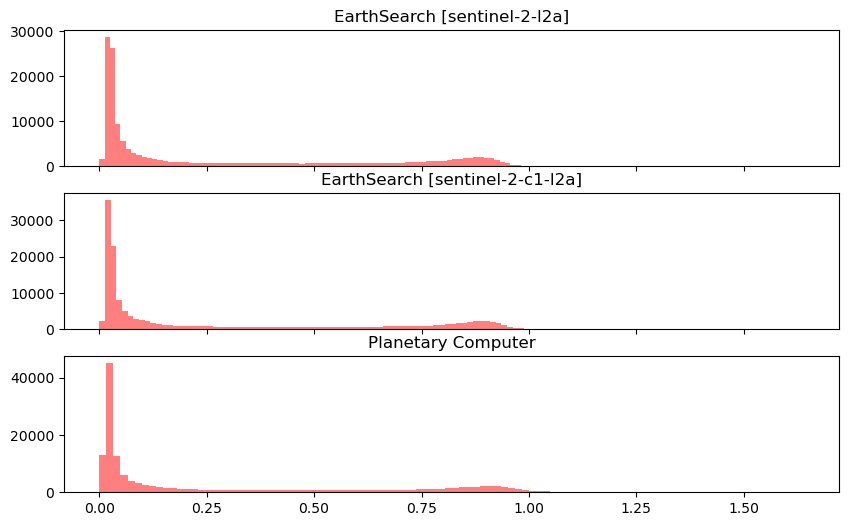

In [8]:
f,axs=plt.subplots(3,1,sharex=True, figsize=(10,6))

axs[0].hist(red_values_es, bins=100, color="r", alpha=0.5, label="red")
axs[0].set_title("EarthSearch [sentinel-2-l2a]")

axs[1].hist(red_values_es_c1, bins=100, color="r", alpha=0.5, label="red")
axs[1].set_title("EarthSearch [sentinel-2-c1-l2a]")

axs[2].hist(red_values_pc, bins=100, color="r", alpha=0.5, label="red")
axs[2].set_title("Planetary Computer")

In [9]:
for catalog,values in zip(["EarthSearch [sentinel-2-l2a]","EarthSearch [sentinel-2-c1-l2a]","Planetary Computer"],[red_values_es,red_values_es_c1,red_values_pc]):
    print(f'{catalog}:\nmin: {np.nanmin(values)}\nmax: {np.nanmax(values)}\nmean: {np.nanmean(values)}\nmedian: {np.nanmedian(values)}\nstd: {np.nanstd(values)}')
    print('--------------------------------------')

EarthSearch [sentinel-2-l2a]:
min: 9.999999747378752e-05
max: 1.226099967956543
mean: 0.27552714943885803
median: 0.06889999657869339
std: 0.3256163001060486
--------------------------------------
EarthSearch [sentinel-2-c1-l2a]:
min: 0.0
max: 1.3184999227523804
mean: 0.2744519114494324
median: 0.06579999625682831
std: 0.32932907342910767
--------------------------------------
Planetary Computer:
min: 0.0
max: 1.6401000022888184
mean: 0.2732629179954529
median: 0.05719999969005585
std: 0.3429371118545532
--------------------------------------


In [10]:
s2_es.get_rgb()
s2_es_c1.get_rgb()
s2_pc.get_rgb()

RGB data retrieved.
Access with the following attributes:
.rgb for raw RGB,
.rgba for RGBA,
.rgb_percentile for percentile RGB,
.rgb_clahe for CLAHE RGB.
You can pass in percentile_kwargs and clahe_kwargs to adjust RGB calculations, check documentation for options.
RGB data retrieved.
Access with the following attributes:
.rgb for raw RGB,
.rgba for RGBA,
.rgb_percentile for percentile RGB,
.rgb_clahe for CLAHE RGB.
You can pass in percentile_kwargs and clahe_kwargs to adjust RGB calculations, check documentation for options.
RGB data retrieved.
Access with the following attributes:
.rgb for raw RGB,
.rgba for RGBA,
.rgb_percentile for percentile RGB,
.rgb_clahe for CLAHE RGB.
You can pass in percentile_kwargs and clahe_kwargs to adjust RGB calculations, check documentation for options.


/home/eric/miniconda3/envs/easysnowdata/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


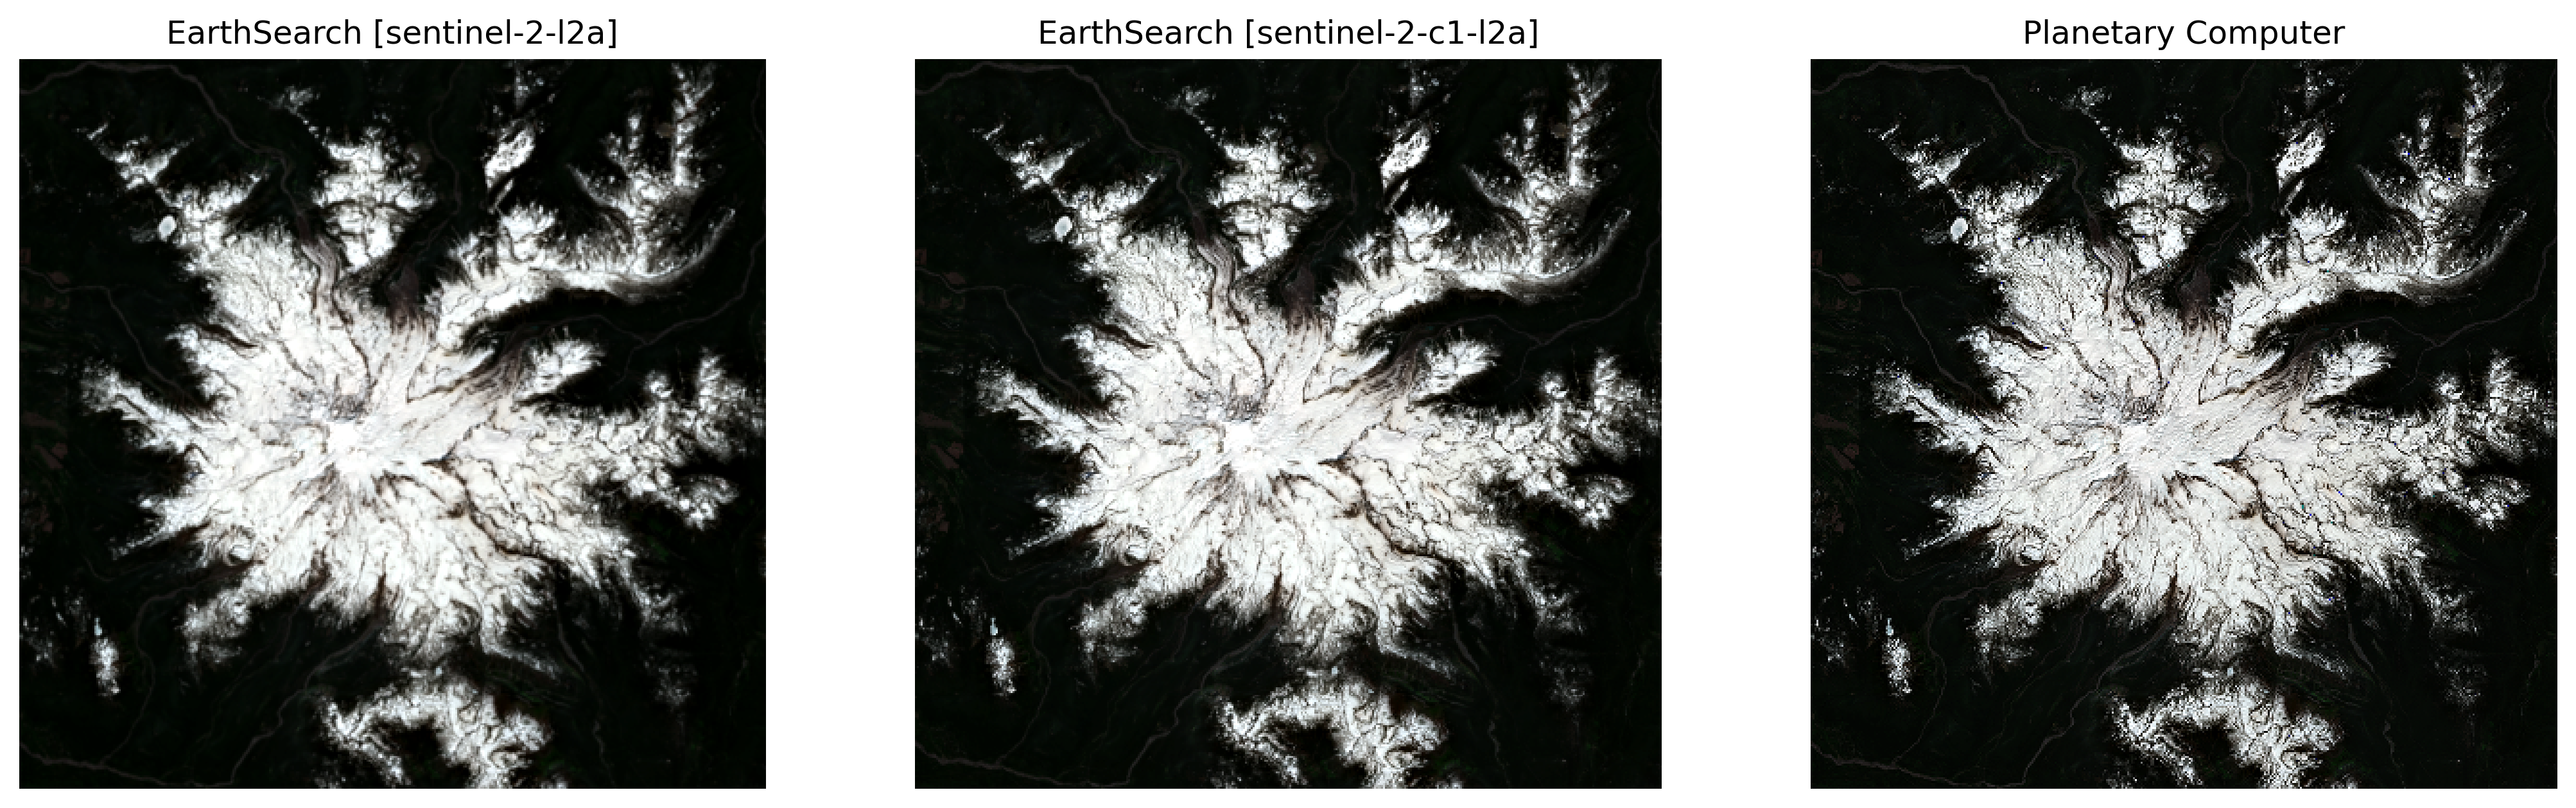

In [11]:
f,axs=plt.subplots(1,3,figsize=(17,5),dpi=300, sharex=True,sharey=True)

s2_es.rgb.isel(time=0).plot.imshow(ax=axs[0],robust=True)
axs[0].set_title("EarthSearch [sentinel-2-l2a]")

s2_es_c1.rgb.isel(time=0).plot.imshow(ax=axs[1],robust=True)
axs[1].set_title("EarthSearch [sentinel-2-c1-l2a]")

s2_pc.rgb.isel(time=0).plot.imshow(ax=axs[2],robust=True)
axs[2].set_title("Planetary Computer")


for ax in axs:
    ax.set_aspect("equal")
    ax.axis('off')

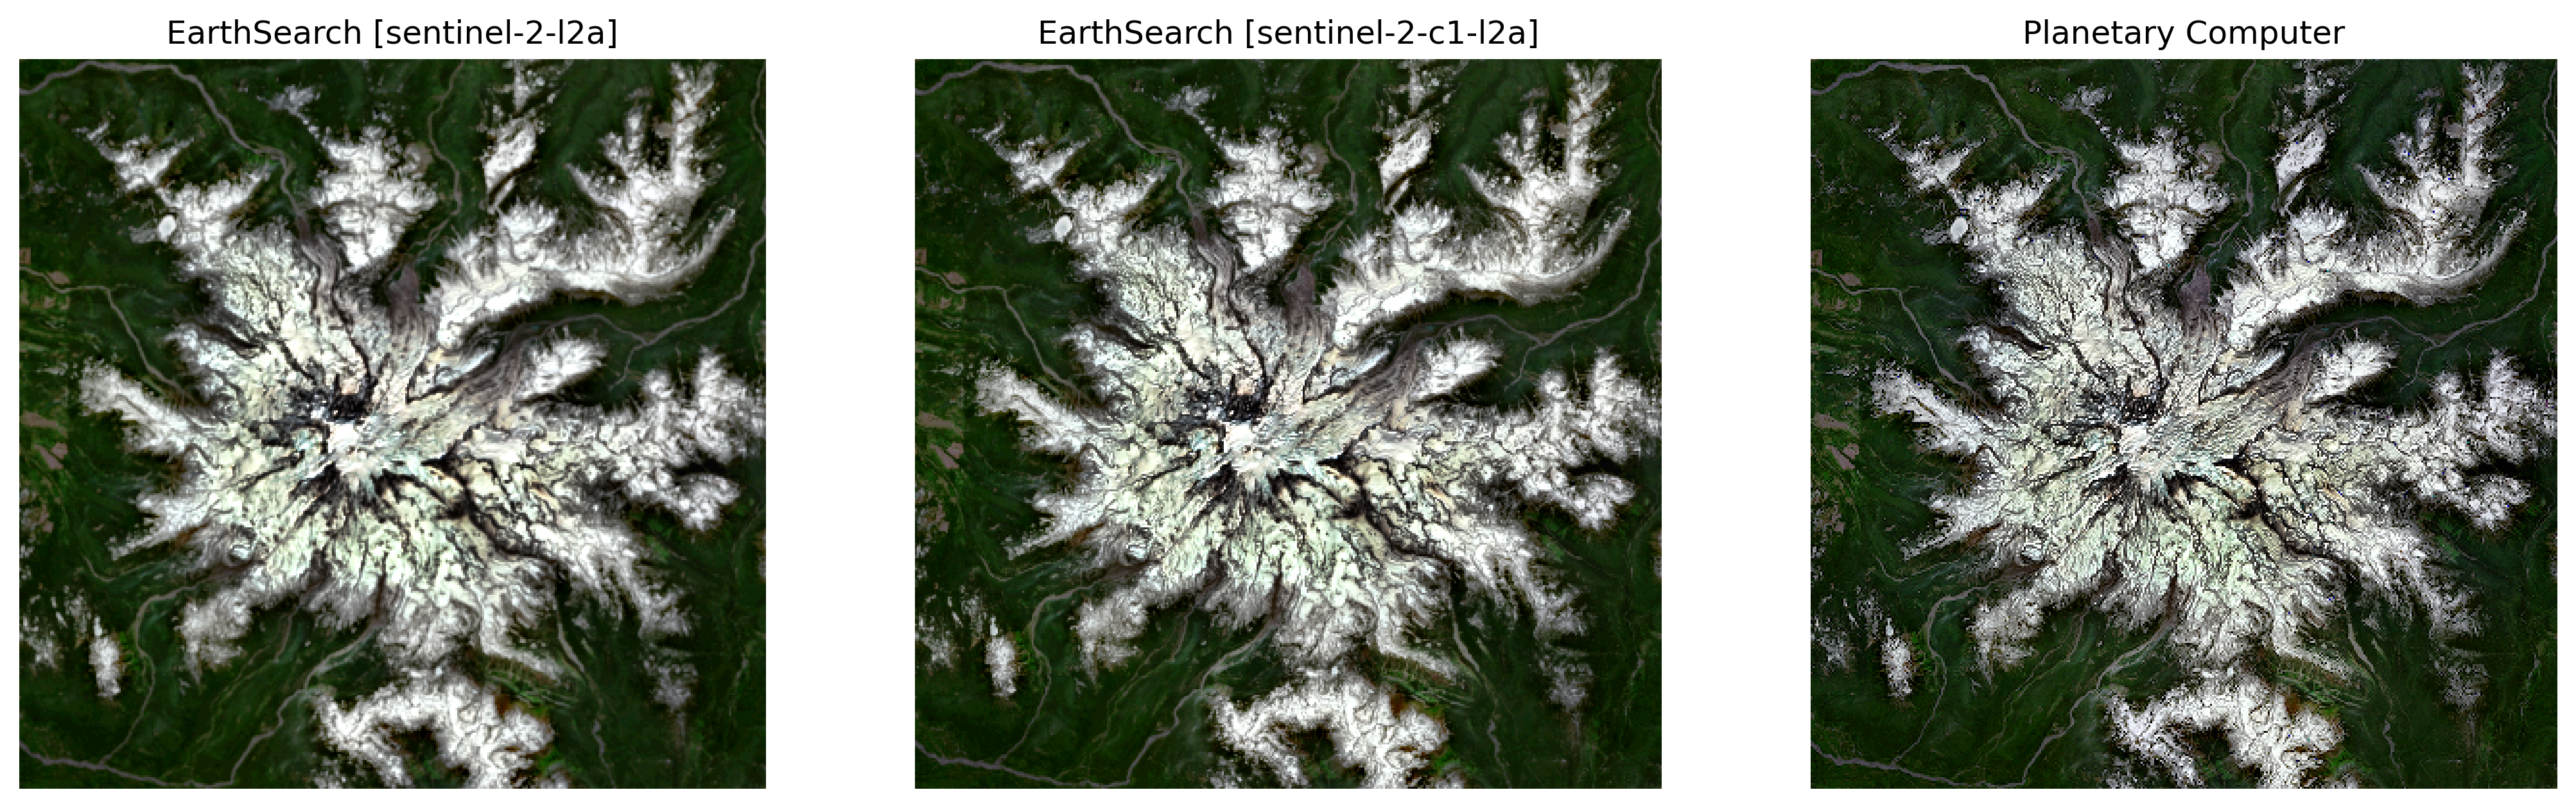

In [12]:
f,axs=plt.subplots(1,3,figsize=(17,5),dpi=300, sharex=True,sharey=True)

s2_es.rgb_clahe.isel(time=0).plot.imshow(ax=axs[0],robust=True)
axs[0].set_title("EarthSearch [sentinel-2-l2a]")

s2_es_c1.rgb_clahe.isel(time=0).plot.imshow(ax=axs[1],robust=True)
axs[1].set_title("EarthSearch [sentinel-2-c1-l2a]")

s2_pc.rgb_clahe.isel(time=0).plot.imshow(ax=axs[2],robust=True)
axs[2].set_title("Planetary Computer")


for ax in axs:
    ax.set_aspect("equal")
    ax.axis('off')

## Now let's check the search and download times

In [13]:
%%time
s2_es = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-01-01",
    end_date="2024-09-30",
    catalog_choice="earthsearch", 
    resolution=80,
)
s2_es.data['red'].compute()

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Since sentinel-2-l2a on earthsearch is used, harmonization step is not needed.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.
CPU times: user 15.3 s, sys: 3.23 s, total: 18.6 s
Wall time: 3min 19s


<xarray.DataArray 'red' (time: 109, y: 380, x: 389)> Size: 64MB
array([[[0.5392    , 0.5367    , 0.5361    , ..., 0.7388    ,
         0.726     , 0.7132    ],
        [0.53709996, 0.5329    , 0.53319997, ..., 0.7499    ,
         0.73469996, 0.72099996],
        [0.536     , 0.5323    , 0.5352    , ..., 0.7637    ,
         0.7489    , 0.73579997],
        ...,
        [0.8339    , 0.8348    , 0.83489996, ..., 0.50119996,
         0.5       , 0.5062    ],
        [0.83419997, 0.8332    , 0.83089995, ..., 0.5026    ,
         0.4944    , 0.50119996],
        [0.8323    , 0.8308    , 0.8285    , ..., 0.5027    ,
         0.49449998, 0.4982    ]],

       [[0.534     , 0.54249996, 0.5554    , ...,        nan,
                nan,        nan],
        [0.52959996, 0.52959996, 0.5434    , ...,        nan,
                nan,        nan],
        [0.5248    , 0.524     , 0.5352    , ...,        nan,
                nan,        nan],
...
        [0.13849999, 0.153     , 0.175     , ...,        nan,
                nan,        nan],
        [0.1485    , 0.1699    , 0.188     , ...,        nan,
                nan,        nan],
        [0.1698    , 0.1848    , 0.18259999, ...,        nan,
                nan,        nan]],

       [[0.0295    , 0.0309    , 0.0248    , ..., 0.0096    ,
         0.0099    , 0.0397    ],
        [0.0161    , 0.0147    , 0.0112    , ..., 0.0096    ,
         0.0142    , 0.0466    ],
        [0.0109    , 0.0099    , 0.0083    , ..., 0.0097    ,
         0.019     , 0.0482    ],
        ...,
        [0.0145    , 0.0144    , 0.0151    , ..., 0.0127    ,
         0.0141    , 0.0136    ],
        [0.0152    , 0.0165    , 0.0152    , ..., 0.0162    ,
         0.0182    , 0.0181    ],
        [0.0135    , 0.0122    , 0.0128    , ..., 0.0184    ,
         0.019     , 0.0226    ]]], dtype=float32)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 872B 2024-01-02T19:11:23.801000 ... 20...

In [14]:
%%time
s2_es_c1 = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-01-01",
    end_date="2024-09-30",
    catalog_choice="earthsearch", 
    collection="sentinel-2-c1-l2a", 
    resolution=80,
)
s2_es_c1.data['red'].compute()

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.
CPU times: user 15 s, sys: 2.78 s, total: 17.8 s
Wall time: 3min 1s


<xarray.DataArray 'red' (time: 109, y: 380, x: 389)> Size: 64MB
array([[[0.53999996, 0.5374    , 0.53819996, ..., 0.7341    ,
         0.72209996, 0.7112    ],
        [0.53859997, 0.5336    , 0.53279996, ..., 0.74549997,
         0.72959995, 0.7147    ],
        [0.5362    , 0.5315    , 0.53499997, ..., 0.75659996,
         0.743     , 0.732     ],
        ...,
        [0.83419997, 0.8359    , 0.8351    , ..., 0.5006    ,
         0.4998    , 0.5096    ],
        [0.8341    , 0.8333    , 0.831     , ..., 0.5001    ,
         0.4917    , 0.5028    ],
        [0.8321    , 0.8312    , 0.8278    , ..., 0.5008    ,
         0.4939    , 0.5002    ]],

       [[0.53069997, 0.5432    , 0.5557    , ...,        nan,
                nan,        nan],
        [0.5331    , 0.5312    , 0.5441    , ...,        nan,
                nan,        nan],
        [0.5202    , 0.5189    , 0.5318    , ...,        nan,
                nan,        nan],
...
        [0.1383    , 0.14999999, 0.17549999, ...,        nan,
                nan,        nan],
        [0.14729999, 0.17029999, 0.19029999, ...,        nan,
                nan,        nan],
        [0.1713    , 0.1875    , 0.1832    , ...,        nan,
                nan,        nan]],

       [[0.0324    , 0.0368    , 0.0309    , ..., 0.0093    ,
         0.0097    , 0.0507    ],
        [0.0185    , 0.0169    , 0.0124    , ..., 0.0095    ,
         0.0141    , 0.0575    ],
        [0.0102    , 0.0102    , 0.0084    , ..., 0.0088    ,
         0.0213    , 0.0541    ],
        ...,
        [0.0107    , 0.0086    , 0.0106    , ..., 0.0126    ,
         0.0144    , 0.0134    ],
        [0.0167    , 0.0172    , 0.0136    , ..., 0.0177    ,
         0.0182    , 0.0198    ],
        [0.0137    , 0.0108    , 0.0122    , ..., 0.0215    ,
         0.0158    , 0.0246    ]]], dtype=float32)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 872B 2024-01-02T19:11:23.801000 ... 20...

In [15]:
%%time
s2_pc = easysnowdata.remote_sensing.Sentinel2(
    bbox_input=bbox_gdf,
    start_date="2024-01-01",
    end_date="2024-09-30",
    catalog_choice="planetarycomputer",
    resolution=80,
)
s2_pc.data['red'].compute()

Data searched. Access the returned seach with the .search attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 10N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data acquired after January 25th, 2022 harmonized to old baseline. To override this behavior, set harmonize_to_old=False.
Data scaled to float reflectance. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute.
CPU times: user 9.05 s, sys: 641 ms, total: 9.7 s
Wall time: 55.6 s


<xarray.DataArray 'red' (time: 106, y: 380, x: 389)> Size: 63MB
array([[[0.5244    , 0.5209    , 0.5239    , ..., 0.7245    ,
         0.71459997, 0.70199996],
        [0.52419996, 0.5169    , 0.5153    , ..., 0.7385    ,
         0.7249    , 0.7026    ],
        [0.52      , 0.514     , 0.5203    , ..., 0.74939996,
         0.73579997, 0.7285    ],
        ...,
        [0.83629996, 0.83779997, 0.84209996, ..., 0.43519998,
         0.43789998, 0.4387    ],
        [0.8373    , 0.8391    , 0.831     , ..., 0.4432    ,
         0.42589998, 0.4362    ],
        [0.8368    , 0.83809996, 0.83379996, ..., 0.44079998,
         0.4251    , 0.42729998]],

       [[0.49229997, 0.5177    , 0.52599996, ...,        nan,
                nan,        nan],
        [0.5098    , 0.5015    , 0.50729996, ...,        nan,
                nan,        nan],
        [0.48169997, 0.477     , 0.4978    , ...,        nan,
                nan,        nan],
...
        [0.1345    , 0.14389999, 0.1672    , ...,        nan,
                nan,        nan],
        [0.1401    , 0.1564    , 0.1917    , ...,        nan,
                nan,        nan],
        [0.1585    , 0.1874    , 0.1963    , ...,        nan,
                nan,        nan]],

       [[0.0265    , 0.0386    , 0.0328    , ..., 0.0108    ,
         0.0068    , 0.0244    ],
        [0.0185    , 0.0142    , 0.012     , ..., 0.0101    ,
         0.0052    , 0.0526    ],
        [0.0101    , 0.0102    , 0.0063    , ..., 0.0087    ,
         0.0026    , 0.0694    ],
        ...,
        [0.018     , 0.0025    , 0.0101    , ..., 0.011     ,
         0.0127    , 0.0142    ],
        [0.0137    , 0.0266    , 0.0179    , ..., 0.0116    ,
         0.0231    , 0.0099    ],
        [0.0138    , 0.0071    , 0.011     , ..., 0.0192    ,
         0.0193    , 0.028     ]]], dtype=float32)
Coordinates:
  * y            (y) float64 3kB 5.206e+06 5.206e+06 ... 5.176e+06 5.176e+06
  * x            (x) float64 3kB 5.804e+05 5.805e+05 ... 6.114e+05 6.115e+05
    spatial_ref  int32 4B 32610
  * time         (time) datetime64[ns] 848B 2024-01-02T19:08:09.024000 ... 20...

## Which dates are available for the different collections? 

In [16]:
catalogs = ["earthsearch sentinel-2-l2a","earthsearch sentinel-2-c1-l2a","planetarycomputer sentinel-2-l2a"]
provider_urls = ["https://earth-search.aws.element84.com/v1","https://earth-search.aws.element84.com/v1","https://planetarycomputer.microsoft.com/api/stac/v1"]
collections = ["sentinel-2-l2a","sentinel-2-c1-l2a","sentinel-2-l2a"]
start_date = "2015-01-01"
end_date = "2024-09-29"

In [17]:
dates_df = pd.DataFrame(index=pd.RangeIndex(10000), columns=catalogs)

for catalog,provider_url,collection in zip(catalogs,provider_urls,collections):
    print(f"Searching {catalog} catalog...")
    catalog_client = pystac_client.Client.open(provider_url)
    search = catalog_client.search(
        collections=[collection],
        bbox=bbox_gdf.total_bounds,
        datetime=(start_date, end_date),
    )

    dates = [item['properties']['datetime'] for item in search.item_collection_as_dict()['features']]
    dates_df.loc[range(len(dates)),catalog] = dates

dates_df = dates_df.dropna(how='all')

for col in dates_df.columns:
    dates_df[col] = pd.to_datetime(dates_df[col],format='mixed')

Searching earthsearch sentinel-2-l2a catalog...
Searching earthsearch sentinel-2-c1-l2a catalog...
Searching planetarycomputer sentinel-2-l2a catalog...


In [18]:
dates_df

earthsearch sentinel-2-l2a    earthsearch sentinel-2-c1-l2a  \
0    2024-09-28 19:11:41.566000+00:00 2024-09-28 19:11:41.566000+00:00   
1    2024-09-28 19:11:38.095000+00:00 2024-09-28 19:11:38.095000+00:00   
2    2024-09-28 19:11:27.971000+00:00 2024-09-28 19:11:27.971000+00:00   
3    2024-09-28 19:11:26.093000+00:00 2024-09-28 19:11:26.093000+00:00   
4    2024-09-26 19:21:39.284000+00:00 2024-09-26 19:21:39.284000+00:00   
...                               ...                              ...   
5437 2017-01-06 19:17:54.459000+00:00                              NaT   
5438 2017-01-03 19:09:49.303000+00:00                              NaT   
5439 2017-01-03 19:09:49.303000+00:00                              NaT   
5440 2017-01-03 19:09:49.303000+00:00                              NaT   
5441 2017-01-03 19:09:49.303000+00:00                              NaT   

     planetarycomputer sentinel-2-l2a  
0    2024-09-28 19:00:59.024000+00:00  
1    2024-09-28 19:00:59.024000+00:00  
2    2024-09-28 19:00:59.024000+00:00  
3    2024-09-28 19:00:59.024000+00:00  
4    2024-09-26 19:11:51.024000+00:00  
...                               ...  
5437                              NaT  
5438                              NaT  
5439                              NaT  
5440                              NaT  
5441                              NaT  

[5442 rows x 3 columns]

<Axes: xlabel='earthsearch sentinel-2-l2a,earthsearch sentinel-2-l2a'>

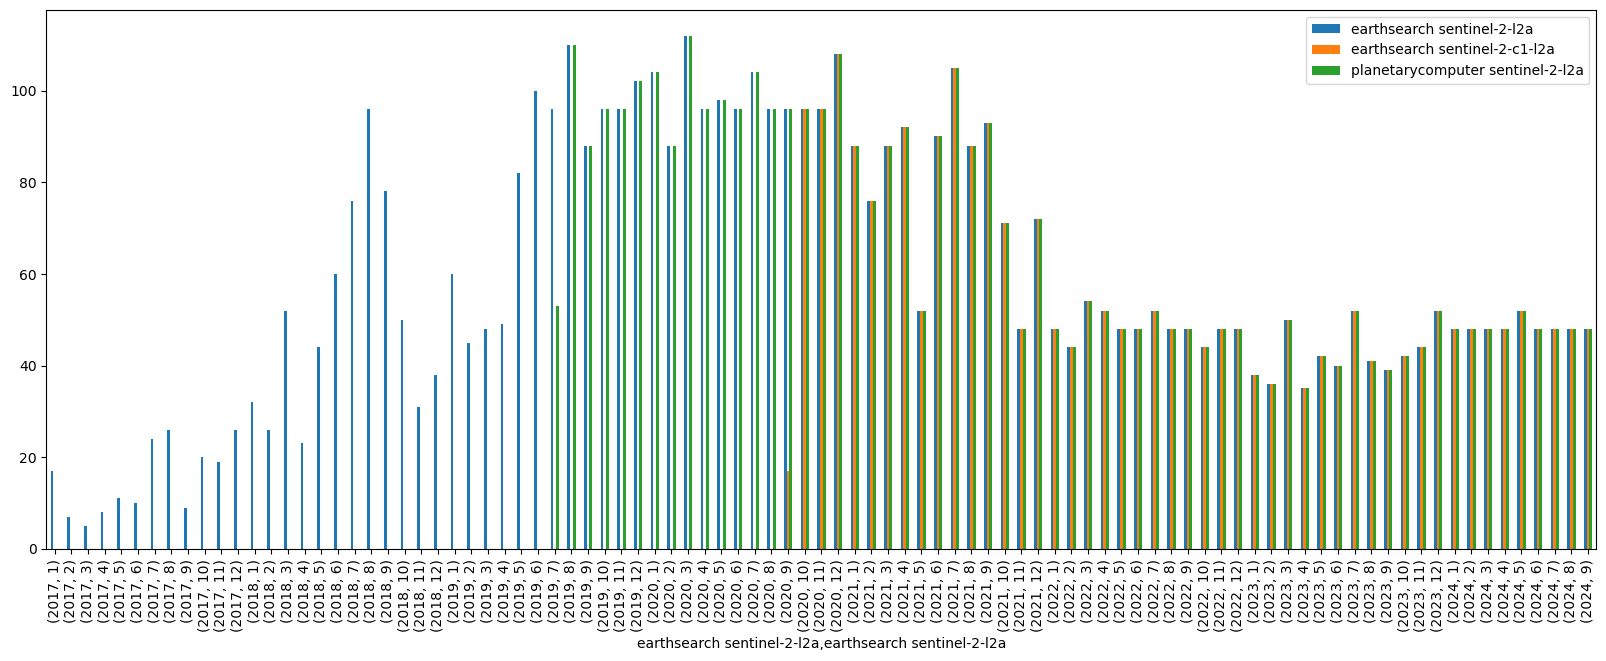

In [19]:
f,ax=plt.subplots(figsize=(20,7))
dates_df.groupby([dates_df[catalogs[0]].dt.year, dates_df[catalogs[0]].dt.month]).count().plot(ax=ax,kind="bar", legend=True)

As of the time of writing (september 2024), for our bounding box, the earthsearch (element84) sentinel-2-l2a collection covers the widest collections of dates [january 2017 - present]. Planetary Computer's sentinel-2-l2a collection comes in next, covering [july 2019 - present]. Finally, the earthsearch (element84) sentinel-2-c1-l2a collection covers [september 2020 - present]. At the moment, all collections are being actively updated with new scenes. The earthsearch sentinel-2-c1-l2a collection is actively being backfilled. Once backfill is complete, the earthsearch sentinel-2-l2a collection will be retired. Check the status [here](https://sentiwiki.copernicus.eu/web/s2-processing#S2Processing-CopernicusSentinel-2Collection-1AvailabilityStatus). Anecdotally (me), in terms of data quality, I've found planetary computer's sentinel-2-l2a collection best for visual inspection, though it seems to contain more data artifacts relative to the other collections. A more rigorous comparison would look at the scenes in many areas at full resolution but also across the different overview levels, being mindful of resampling techniques, scaling, visualization, etc. Often, I've found the download on planetarycomputer to be faster than earthsearch. Overall, I think each collection has its own strengths and weaknesses (at the time).